<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [0]:
import numpy as np #linear algebra library of Python
import pandas as pd # build on top of numpy for data analysis, data manipulation and data visualization
import matplotlib.pyplot as plt #plotting library of Python

Now let's mount Google drive so that we can upload the diabetes.csv file. You can find the code in the 'Code snippets' tab of Colab

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First thing that we do is take a look at the shape of the dataframe (df.shape) and take a look at first 5 lines through df.head()

In [22]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Mall_Customers.csv') #import file from Google Drive and create a pandas dataframe df
df.head() #shows first 5 lines including column namesdf.shape # number of rows and columns of dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.shape # provides # rows and # columns of the dataframe df - 200 rows and 5 columns

(200, 5)

In [0]:
X=df.iloc[:, [3,4]].values # selects columns 3 and 4 of the dataframe (2 last colums) - it means that we want to cluster with respect to income and spending score

Now we are ready for K-means and we will start by finding the best k. This is the so-called elbow method. Basically we will calculate the cost for different values of k. As k increases the cost will decrease. The for loop will fit the kmeans algorithm to our data and will compute the within cluster sum of squares (wcss) and appended to our wcss list


Parameters kmeans:

init: 'random': random initiualization method - choose k observations (rows) at random from data for the initial centroids (overlap data with centroids)

max_iter: maximum number of iterations of the k-means algorithm for a single run to converge

n_init: number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

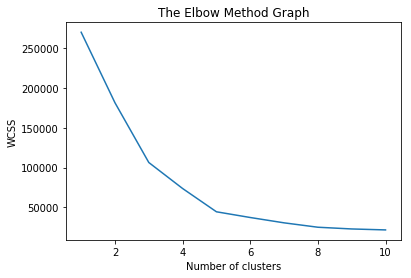

In [36]:
from sklearn.cluster import KMeans
wcss=[] # wccs is 'within cluster sum of squares'
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42) #random_state makes sure that we always get same numbers everytime we rerun the code
    kmeans.fit(X) # fits the modelcompute k-means clustering
    wcss.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center.

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Based on above graph (k vs. Cost) we suggest to take k=5 (5 centroids meaning 5 clusters)

In [0]:
model=KMeans(n_clusters=5,init='random', max_iter=300, n_init=10, random_state=42)
y_kmeans=model.fit_predict(X) # output is a vector with all samples and their cluster index

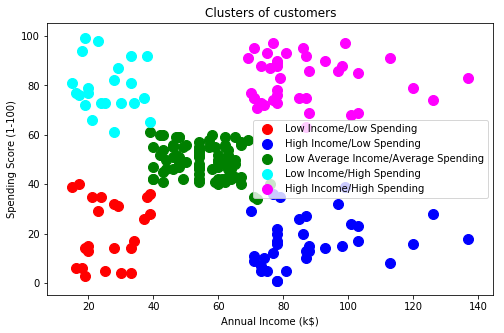

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Low Income/Low Spending') #s is size of point
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income/Low Spending')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Average Income/Average Spending')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income/High Spending')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income/High Spending')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc=0)
plt.show()

X[y_kmeans == 0, 0] means outcome is cluster index 0 for column 0